# IM System - Exercise

Helder Vieira  
RA: 169496

## Config Environ

In [1]:
!pip install openai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 KB 2.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for openai: filename=openai-0.26.5-py3-none-any.whl size=67620 sha256=9697899c324135cd12425236d4a1d32b4098893a9721024f58055ecf8a087e57
  Stored in directory: /root/.cache/pip/wheels/a7/47/99/8273a59fbd59c303e8ff175416d5c1c9c03a2e83ebf7525a99
Successfully built openai


In [2]:
import os
import openai

# 1. Reading dataset

In [3]:
!wget http://ir.dcs.gla.ac.uk/resources/test_collections/cisi/cisi.tar.gz

--2023-02-22 20:09:35--  http://ir.dcs.gla.ac.uk/resources/test_collections/cisi/cisi.tar.gz
Resolving ir.dcs.gla.ac.uk (ir.dcs.gla.ac.uk)... 130.209.240.253
Connecting to ir.dcs.gla.ac.uk (ir.dcs.gla.ac.uk)|130.209.240.253|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 775144 (757K) [application/gzip]
Saving to: ‘cisi.tar.gz’

cisi.tar.gz         100%[===================>] 756.98K  1.67MB/s    in 0.4s    

2023-02-22 20:09:36 (1.67 MB/s) - ‘cisi.tar.gz’ saved [775144/775144]



In [4]:
!tar -xf cisi.tar.gz

# 2. Generating code with chatGPT

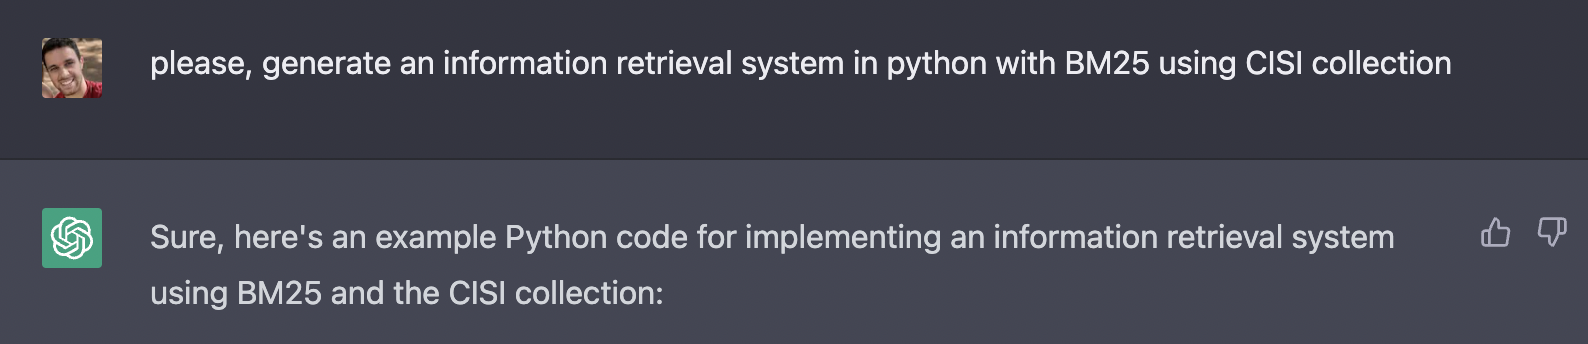

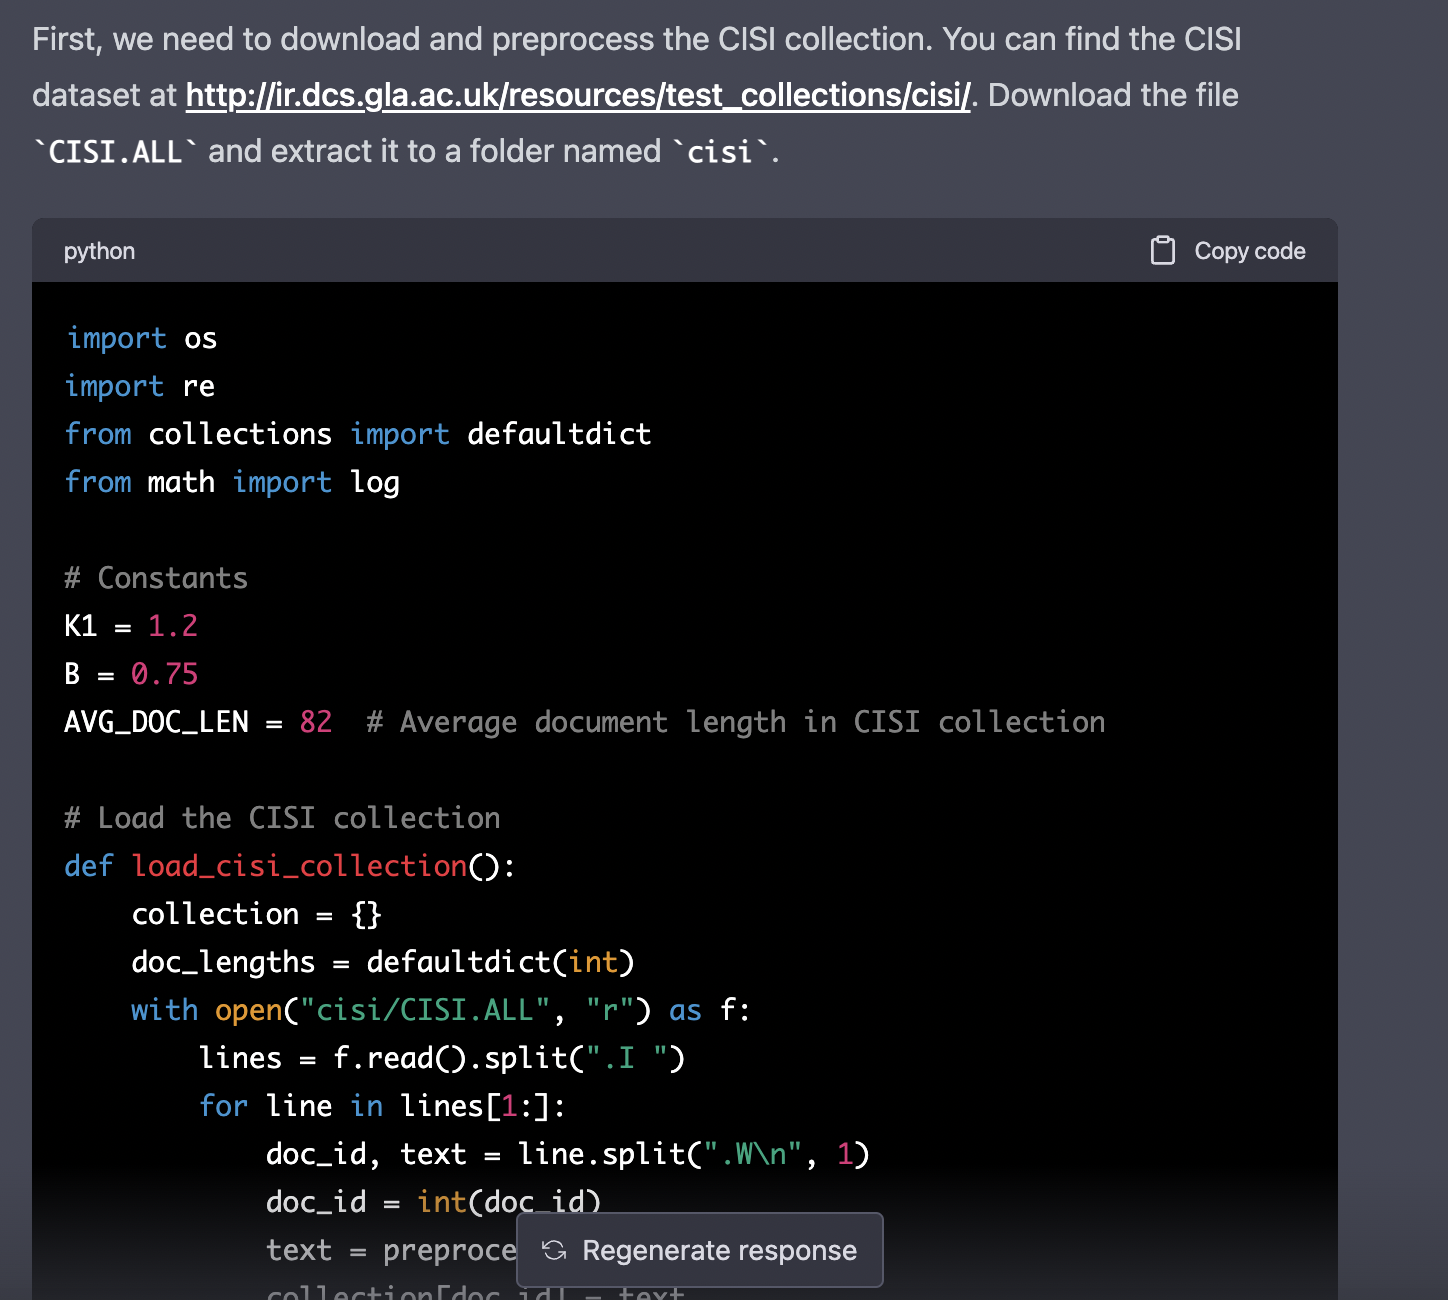

# 3. ChatGPT Implementation

Small manual changes have an adicional comment with "Manual change" prefix

In [40]:
import os
import re
from collections import defaultdict
from math import log

# Constants
K1 = 1.2
B = 0.75
AVG_DOC_LEN = 82  # Average document length in CISI collection

# Load the CISI collection
def load_cisi_collection():
    collection = {}
    doc_lengths = defaultdict(int)
    titles = {}
    # Manual change: fixing the file PATH
    with open("CISI.ALL", "r") as f:
        lines = f.read().split(".I ")
        for line in lines[1:]:
            # Manual change: the parsing was getting the doc_id wrong
            doc_id = line.split('.T')[0]
            text = line.split('.W')[1].split('.X')[0]
            # Manual change: adding the title
            title = line.split('.T')[1].split('.A')[0].strip('\n')
            doc_id = int(doc_id)
            text = preprocess(text)
            collection[doc_id] = text
            doc_lengths[doc_id] = len(text.split())
            titles[doc_id] = title
    return collection, doc_lengths, titles

# Preprocess text
def preprocess(text):
    text = text.lower()
    text = re.sub(r"[^a-z0-9\s]", "", text)  # Remove punctuation
    text = re.sub(r"\s+", " ", text)  # Remove extra whitespace
    return text.strip()

collection, doc_lengths, titles = load_cisi_collection()


In [35]:
# Calculate BM25 score
def bm25(query, doc_id, collection, doc_lengths, avg_doc_len):
    score = 0
    doc = collection[doc_id]
    for term in query.split():
        tf = doc.count(term)
        idf = log((len(collection) - count_docs_with_term(term) + 0.5) / (count_docs_with_term(term) + 0.5))
        numerator = tf * (K1 + 1)
        denominator = tf + K1 * (1 - B + B * (doc_lengths[doc_id] / avg_doc_len))
        score += idf * (numerator / denominator)
    return score

# Count the number of documents that contain a term
def count_docs_with_term(term):
    count = 0
    for doc_id, doc in collection.items():
        if term in doc:
            count += 1
    return count

avg_doc_len = sum(doc_lengths.values()) / len(doc_lengths)


In [43]:
# Retrieve documents using a query
def retrieve(query, collection, doc_lengths):
    scores = defaultdict(float)
    for doc_id, doc in collection.items():
        score = bm25(query, doc_id, collection, doc_lengths, AVG_DOC_LEN)
        scores[doc_id] = score
    return sorted(scores.items(), key=lambda x: x[1], reverse=True)

# Manual change: wrapping chatGPT code to a function to generate the report
def generate_report(query, nb_results):
    # Retrieve documents
    results = retrieve(query, collection, doc_lengths)

    # Print top nb_results results
    for i, (doc_id, score) in enumerate(results[:nb_results]):
        # Manual change: adding the title to the report
        print(f"Rank: {i+1}\nDoc ID: {doc_id}\nTitle: {titles[doc_id]}\nScore: {score:.4f}")
        print(collection[doc_id][:200], "...\n")

    return results[:nb_results]

# Example query
query = "information retrieval"

# Print top 10 results
results = generate_report(query, 10)

Rank: 1
Doc ID: 565
Title: Computer Evaluation of Indexing and Text Processing
Score: 3.8261
automatic indexing methods are evaluated and design criteria for modern information system are derived information retrieval indexing methods automatic retrieval information systems document retrieval ...

Rank: 2
Doc ID: 539
Title: Information Retrieval Languages
Score: 3.7047
this book gives classification and detailed description of different types of information retrieval languages a universal scheme served as the basis for classifying information retrieval languages the ...

Rank: 3
Doc ID: 509
Title: The Use of Hierarchic Clustering in Information Retrieval
Score: 3.4103
we introduce information retrieval strategies which are based on automatic hierarchic clustering of documents we discuss the evaluation of retrieval strategies and show using a subset of the cranfield ...

Rank: 4
Doc ID: 1136
Title: Data Retrieval Systems:  Specifics and Problems
Score: 3.3827
the essential differences b

# 3. Usage

In [44]:
# Write a query
query = 'algorithm'

# Define how many results you want to see
NB_RESULTS = 4

results = results = generate_report(query, NB_RESULTS)

Rank: 1
Doc ID: 569
Title: Stereochemically Unique Naming Algorithm
Score: 5.6026
an algorithm has been developed and implemented to generate for each chemical structure a unique and invariant linear name which includes double bond and asymmetric carbon isomerism a logical proof is ...

Rank: 2
Doc ID: 706
Title: A Graph-Theoretic Algorithm for Matching Chemical Structures
Score: 5.2775
there are many chemical retrieval systems which process the first type of request efficiently most of these systems are also capable of handling certain fragment requests however the fragments which c ...

Rank: 3
Doc ID: 450
Title: Selection of Equifrequent Word Fragments for Information Retrieval
Score: 4.9792
the design of programs to research large document data bases is discussed with regard to the use of compression coding combined with adoption of word fragments as the basic language elements an algori ...

Rank: 4
Doc ID: 708
Title: An Efficient Design for Chemical Structure Searching. I. The Sc

# 4. Searching for general explanations about Information Retrieval Systems

In [ ]:
# Personal openAI API Key
openai.api_key = '<insert your api-key>'

assert openai.api_key != '<insert your api-key>', 'Did you change do your api_key?'

In [45]:
query_gpt = """
    Please, explain in few words what is an Information Retrival system
"""

response = openai.Completion.create(
  model="text-davinci-003",
  prompt=query_gpt,
  temperature=0.6,
  max_tokens=4000
)

response

<OpenAIObject text_completion id=cmpl-6mqRqhFBNCMLsringUKZQW5WtAWj8 at 0x7f8e94377f40> JSON: {
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": null,
      "text": "\nAn Information Retrieval system is a system that enables users to search for and retrieve information from a large collection of documents. It can include search engines, databases, and other tools that help users quickly find the information they need."
    }
  ],
  "created": 1677099374,
  "id": "cmpl-6mqRqhFBNCMLsringUKZQW5WtAWj8",
  "model": "text-davinci-003",
  "object": "text_completion",
  "usage": {
    "completion_tokens": 47,
    "prompt_tokens": 16,
    "total_tokens": 63
  }
}

In [46]:
print(response['choices'][0]['text'])


An Information Retrieval system is a system that enables users to search for and retrieve information from a large collection of documents. It can include search engines, databases, and other tools that help users quickly find the information they need.
